## **Задание 1**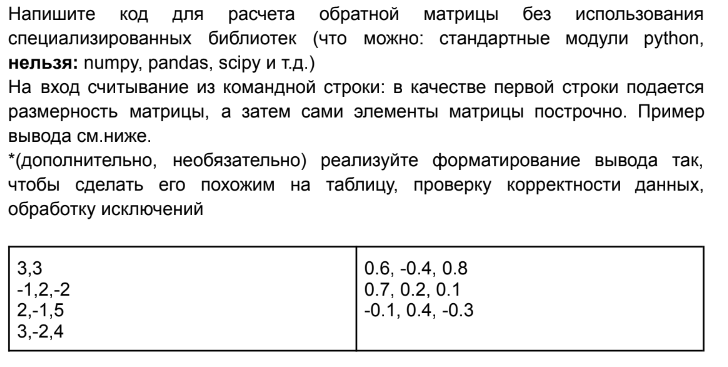

Импорт регулярок для проверки корректности данных

In [ ]:
import re

Проверка на инт

In [ ]:
def isint(s): 
    try:
        int(s)
        return True
    except ValueError:
        return False

Размерность матрицы

In [ ]:
def create_matrix():
    flag = False
    while flag == False:
        n = input('Введите размерность таблицы(одно натуральное число, матрица квадратная): ')
        flag = isint(n)  # Проверка на int 
        if (flag == False):
            print('Попробуйте еще раз: ')
        else: 
            n=int(n)
            if n<=0:  # Проверка на натуральное число
                print('Попробуйте еще раз: ')
                flag = False
    # Создание матрицы        
    A = [[0.0] * n for i in range(n)]
    max_length = 0  # Максимальная длина числа(необходимо для красивого вывода матрицы)
    template = r'[^-.,\d]'
    for i in range (0,n*n):
        flag=True
        while flag:
                k = 0
                a = input(f'[{i//n}][{i%n}]')  # Ввод значений матрциы
                
                # Проверка на вещественное число
                if (re.findall(template, a) == []) & (len([k+1 for i in a if  (i=='.') | (i==',')]) < 2) & (a != '') :
                    if ',' in a:   # Если пользователь захочет, вместо '.', использовать ','
                        a = a.replace(',', '.')
                    A[i//n][i%n] = float(a)
                    flag=False
                else:
                    print('Попробуйте еще раз:')
                if len(str(A[i//n][i%n])) > max_length:  # Поиск максимальной длины числа
                    max_length = len(str(A[i//n][i%n]))
    return A, n, max_length

Вывод матрицы

In [ ]:
def print_matrix(x,n, max_length):
    for i in range(0,n*n):
        if i%n==0:
            print('_'*(n*max_length + n+1))  # Черта для таблички
        print(f'|{x[i//n][i%n]:<{max_length}}',end='')  # Вывод с условием форматирования под максимальную длину числа
        if (i%n == n-1): 
            print('|')  # Черта для таблички
    print('_'*(n*max_length + n+1))  # Черта для таблички

Обратная матрица

In [ ]:
import copy
from fractions import Fraction

def gauss(a):
    a = copy.deepcopy(a)
    n = len(a)
    
    b = [[0.0] * n for i in range(n)]  # Создание единичной матрицы
    for i in range(n):
        for j in range(n):
            if i == j:
                b[i][j] = 1
                
    b = copy.deepcopy(b) # Алгоритм по созданию обратной матрицы
    max_length = 0
    det = 1
    for i in range(n - 1):
        k = i
        for j in range(i + 1, n):
            if abs(a[j][i]) > abs(a[k][i]):
                k = j
        if k != i:
            a[i], a[k] = a[k], a[i]
            b[i], b[k] = b[k], b[i]
            det = -det
            
        for j in range(i + 1, n):
            t = a[j][i]/a[i][i]
            for k in range(i + 1, n):
                a[j][k] -= t*a[i][k]
            for k in range(n):
                b[j][k] -= t*b[i][k]
                
    for i in range(n - 1, -1, -1):
        for j in range(i + 1, n):
            t = a[i][j]
            for k in range(n):
                b[i][k] -= t*b[j][k]
        t = 1/a[i][i]
        det *= a[i][i]
        for j in range(n):
            b[i][j] *= t
            b[i][j] = round(b[i][j],1)
            if len(str(b[i][j])) > max_length: #Поиск максимальной длины числа
                max_length = len(str(b[i][j]))
    det = round(det,1) 
    return b, max_length

In [ ]:
a, n, max_length_a = create_matrix()
print('Введенная матрица: ')
print_matrix(a, n, max_length_a)
b, max_length_b = gauss(a)
print('Обратная матрица: ')
print_matrix(b, n, max_length_b)

Введите размерность таблицы(одно натуральное число, матрица квадратная): 4
[0][0]2
[0][1]2
[0][2]1
[0][3]5
[1][0]7
[1][1]2
[1][2]5
[1][3]3
[2][0]3
[2][1]9
[2][2]10
[2][3]12,421
[3][0]453.2
[3][1]df
Попробуйте еще раз:
[3][1]123
[3][2]14,532
[3][3]2
Введенная матрица: 
_____________________________
|2.0   |2.0   |1.0   |5.0   |
_____________________________
|7.0   |2.0   |5.0   |3.0   |
_____________________________
|3.0   |9.0   |10.0  |12.421|
_____________________________
|453.2 |123.0 |14.532|2.0   |
_____________________________
Обратная матрица: 
_____________________
|0.1 |0.1 |-0.1|0.0 |
_____________________
|-0.2|-0.4|0.2 |-0.0|
_____________________
|-0.2|0.2 |0.1 |-0.0|
_____________________
|0.3 |0.1 |-0.1|-0.0|
_____________________


In [ ]:
4
